<a href="https://colab.research.google.com/github/dareng5/PythonProject3/blob/master/Unit3Porject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Social Distancing and Enforcement: Parks Patrol Data

https://data.cityofnewyork.us/dataset/Social-Distancing-and-Enforcement-Parks-Patrol-Dat/yv25-wqf9

Each line of data is a patrol conducted by Parks Enforcement Patrol or the Urban Park Rangers in relation to COVID-19 education and enforcement. The data will indicate whether there was an encounter on parks property, the type of encounter if there was one, the number of patrons interacted with, what feature of the park the patron was using, as well as some additional enforcement details related to encounters.

Data is collected by officers who input the information either on a mobile device while on patrol, or on a computer once they've returned to the office from a patrol. Patrons logged as non-compliant may have complied during a subsequent encounter, after the entry took place, or from further intervention from additional law enforcement. The data is collected on a daily basis, and is cleaned daily to ensure consistency in data entry.

Limitations of this dataset include, but are not limited to: Does not include the duration of the patrol in a given park; Does not include all summonses written during that park visit; Does not include non-COVID-19 related encounters (e.g., standard dog off leash conditions, smoking conditions, etc.); Does not necessarily represent the patrol of an entire property (e.g., a patrol unit may not have visited every feature in a larger park); Does not provide demographic information on patrons encountered (e.g., age, sex, race, etc.); Does not provide detailed descriptions of the patrol encounters; Does not account for every Beach - Water trespassing incident prior to beach openings. 

This dataset has undergone a number of changes since it was created, and continues to undergo changes as needed. Changes have included: Changing some of the selections in the drop downs for the location within a park, adding new properties to the property lists, and modifying the language for the questions. Some questions have also been removed as operational practices have changed. Required fields are detailed in the "Data Dictionary" tab of this document. The questions and values are also changed frequently to reflect new policy decisions (e.g. Phase 2/3 reopenings).

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
import math
import statsmodels.api as sm

#import data from NYC Open Data - https://data.cityofnewyork.us/dataset/Social-Distancing-and-Enforcement-Parks-Patrol-Dat/yv25-wqf9
df = pd.read_csv('https://raw.githubusercontent.com/dareng5/DataSets/master/Social_Distancing_and_Enforcement__Parks_Patrol_Data.csv', parse_dates=['encounter_datetime'], infer_datetime_format=True)

#drop rows without date
df = df.dropna(subset=['encounter_datetime','simplified_encounter_type'])

#breakdown the datetime
df['month'] = df.encounter_datetime.dt.month_name()
df['hour'] = df.encounter_datetime.dt.hour
df['weekofyear'] = df.encounter_datetime.dt.weekofyear
df['dayofyear'] = df.encounter_datetime.dt.dayofyear

#assign shift from hour
df['shift'] = pd.cut(df['hour'], [-1,7,15,23],labels=['0000-0800','0800-1600','1600-2400'])

#add patrol count
df['count'] = 1

#combine and clean up amenity
df['amenity'] = df['closed_amenity'].fillna('') + df['sd_amenity'].fillna('')
df = df.replace({'amenity':{'Beach - Water':'Beach', 'Bench/sitting area':'Beach', 'Dog Run':'Dog run', 'Tennis court':'Tennis courts'}})

#rename Patrons in Closed Area
df = df.replace({'simplified_encounter_type':{'Patrons in Closed Area':'Trespassing'}})

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,7,9,10,11,12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


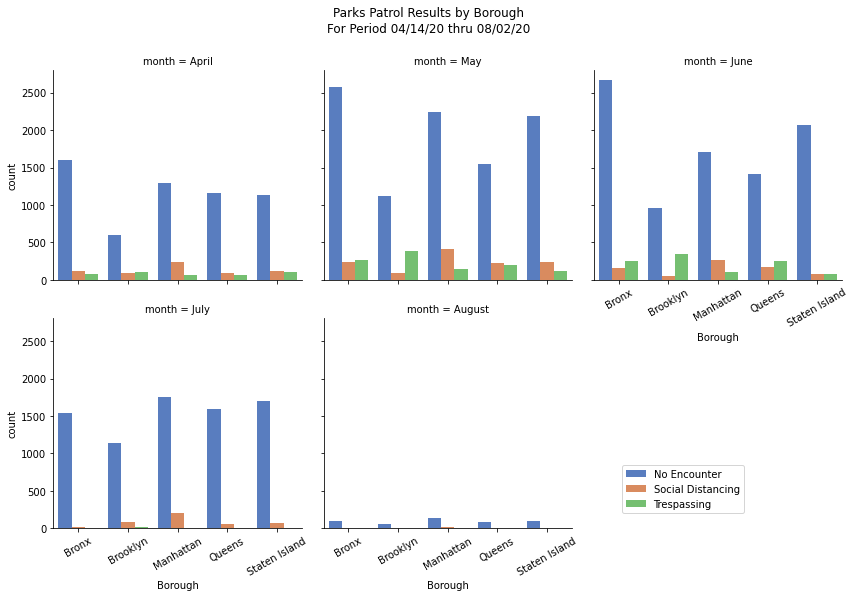

In [36]:
#showing results of patrols by borough over time
dfborough = df.groupby(['month','park_borough','simplified_encounter_type'])['count'].sum().reset_index()

g1 = sns.catplot(x='park_borough', y='count', hue='simplified_encounter_type',
                 col='month', col_wrap=3, col_order=['April','May','June','July','August'],
                 data=dfborough, kind='bar', palette=sns.color_palette('muted'),
                 height=4, aspect=1, legend=False)
plt.legend(bbox_to_anchor=(1.2, 0.3), loc='upper left', borderaxespad=0.)
plt.subplots_adjust(top=.87)
g1.fig.suptitle('Parks Patrol Results by Borough\nFor Period 04/14/20 thru 08/02/20')
g1.set_xticklabels(rotation=30)
g1.set_axis_labels('Borough')
plt.show(g1)

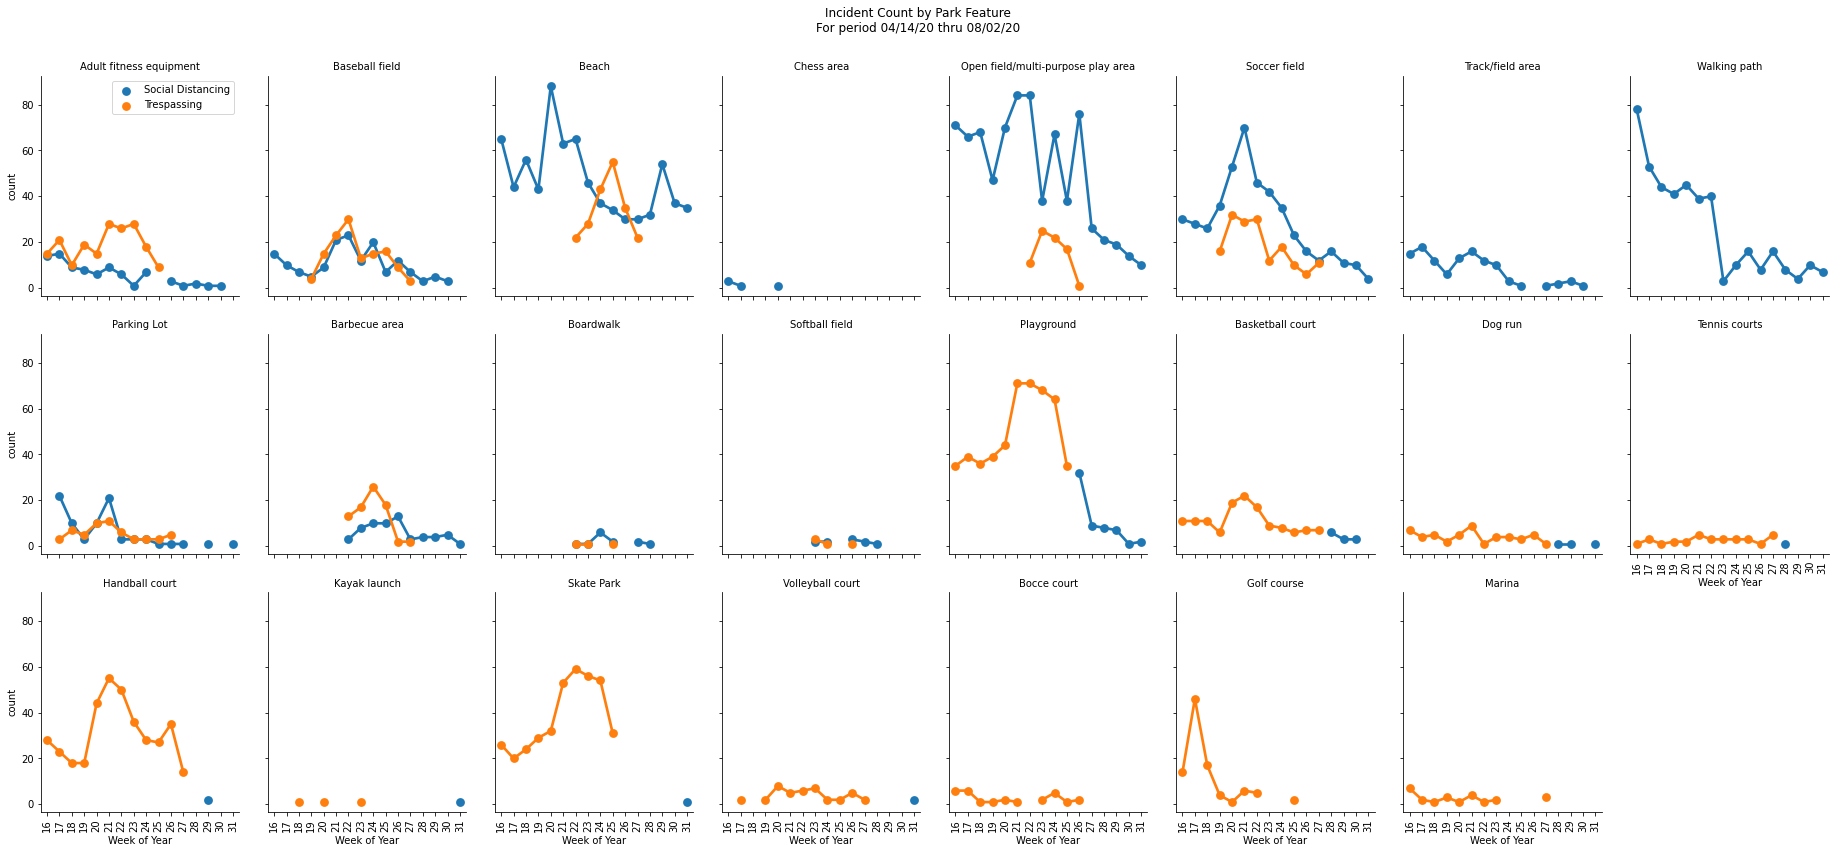

In [37]:
#showing encounter by Amenity over time
dfanemity = df[(df['simplified_encounter_type']!='No Encounter')]
dfanemity = dfanemity.groupby(['simplified_encounter_type','weekofyear','amenity'])['count'].sum().reset_index()

g2 = sns.catplot(x='weekofyear', y='count', hue='simplified_encounter_type',
                 col='amenity', col_wrap=8,
                 data=dfanemity, kind='point',
                 height=4, aspect=.8, legend_out=False)
plt.subplots_adjust(top=.9)
g2.fig.suptitle('Incident Count by Park Feature\nFor period 04/14/20 thru 08/02/20')
g2.set_titles("{col_name}")
g2.set_xticklabels(rotation=90)
g2.set_axis_labels('Week of Year')
g2._legend.set_title('')
plt.show(g2)

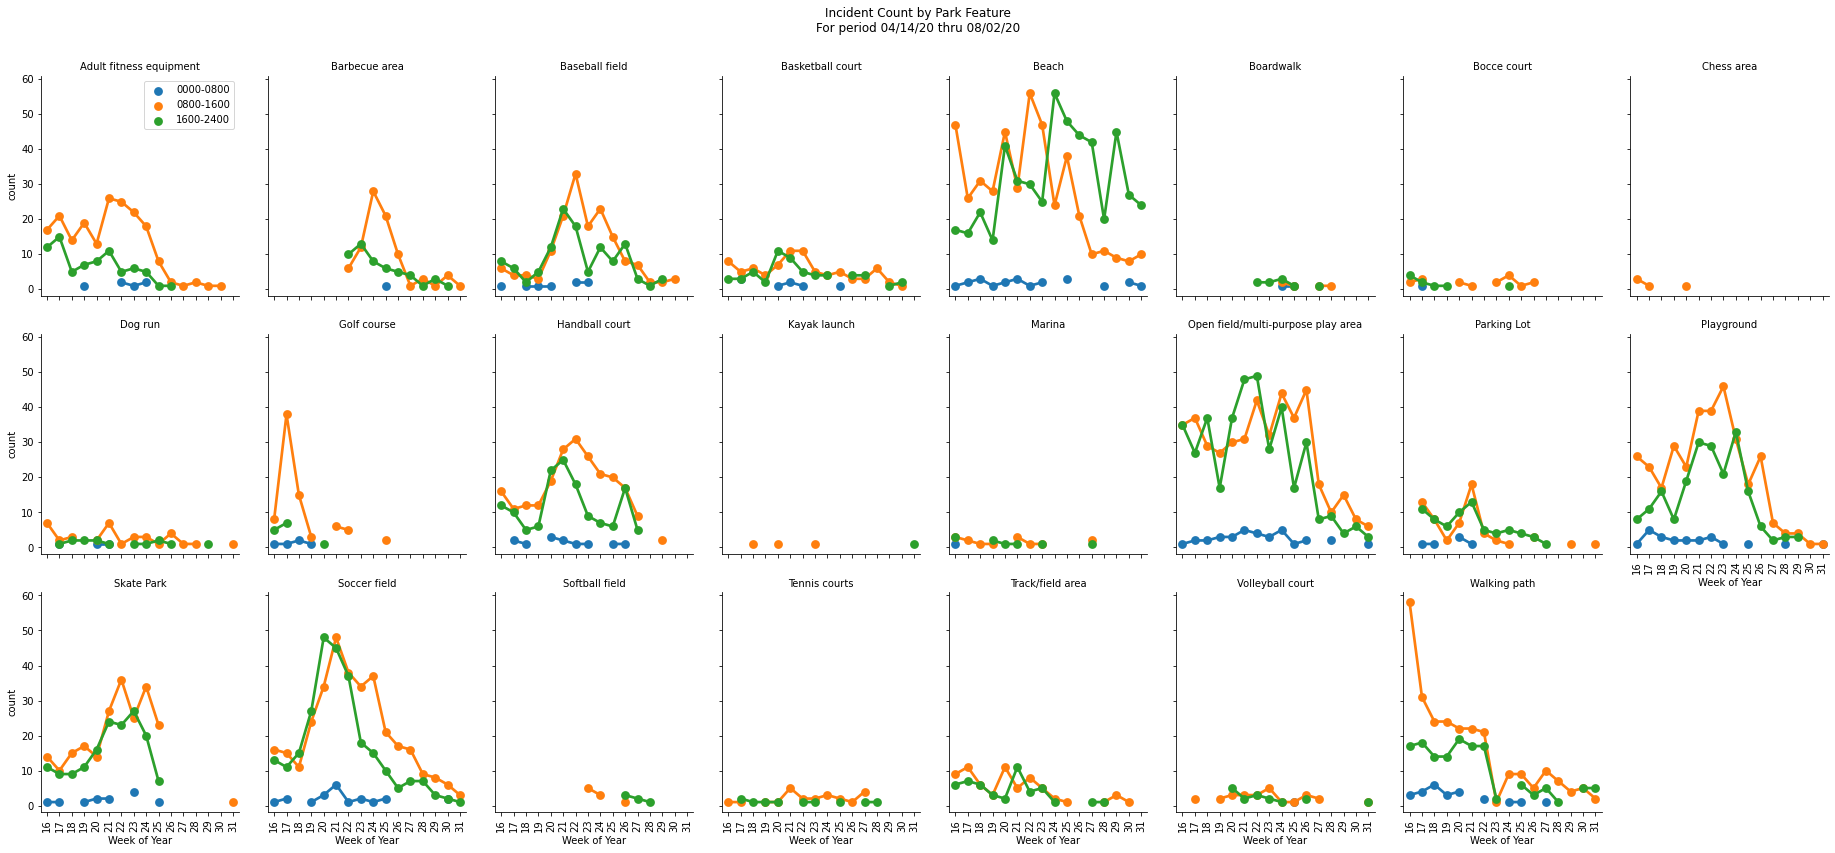

In [38]:
#showing encounter by Amenity over time
dfshift = df[(df['simplified_encounter_type']!='No Encounter')]
dfshift = dfshift.groupby(['shift','weekofyear','amenity'])['count'].sum().reset_index()

g3 = sns.catplot(x='weekofyear', y='count', hue='shift',
                 col='amenity', col_wrap=8,
                 data=dfshift, kind='point',
                 height=4, aspect=.8, legend_out=False)
plt.subplots_adjust(top=.9)
g3.fig.suptitle('Incident Count by Park Feature\nFor period 04/14/20 thru 08/02/20')
g3.set_titles("{col_name}")
g3.set_xticklabels(rotation=90)
g3.set_axis_labels('Week of Year')
g3._legend.set_title('')
plt.show(g3)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     43.06
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.85e-09
Time:                        00:38:56   Log-Likelihood:                -465.01
No. Observations:                 111   AIC:                             934.0
Df Residuals:                     109   BIC:                             939.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5148      7.787      9.955      0.0

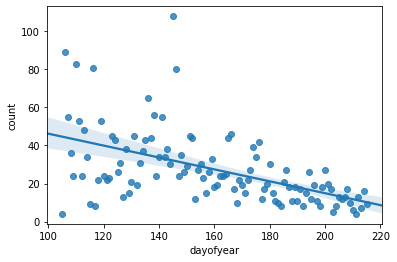


The estimated date of no scoial distancing encounter from patrols is 2020-09-04.


In [39]:
#rending on social distancing encounter
dftrend = df[(df['simplified_encounter_type']=='Social Distancing')]
dftrend = dftrend.groupby(['dayofyear'])['count'].sum().reset_index()

#fit a linear model using OLS (ordinary least squares) method
model = sm.OLS(dftrend['count'], sm.add_constant(dftrend['dayofyear']))
results = model.fit()
print(results.summary())

#plot graph
g4 = sns.regplot(x='dayofyear', y='count', data=dftrend, truncate=False)
plt.show(g4)

#estimate date where social distancing encounter = 0
d1 = int(math.ceil(-results.params['const']/results.params['dayofyear']))
d2 = pd.to_datetime(2020 * 1000 + d1, format='%Y%j').date()
print('\nThe estimated date of no scoial distancing encounter from patrols is ' + str(d2) + '.')

#    y     = -0.3131x +  77.5148 
#-77.5148  = -0.3131x
#    x     = -77.5148/-0.3131